In [89]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=1806)

Lasso on sklearn's diabetes dataset


In [93]:
import numpy as np
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)

train_R_square = lasso.score(X_train,y_train)

test_R_square = lasso.score(X_test,y_test)

np.sum(lasso.coef_!= 0)

k=np.array(diabetes.feature_names)

print("The Number of features used are =",np.sum(lasso.coef_!= 0))

print("The features used are =", k[lasso.coef_!=0])

print("R*2 for train = ",lasso.score(X_train,y_train))

print("R*2 for test = ",lasso.score(X_test,y_test))




The Number of features used are = 2
The features used are = ['bmi' 's5']
R*2 for train =  0.3752773016717367
R*2 for test =  0.3129513083651597


Lasso on downloaded diabetes dataset.

In [102]:
import numpy as np

from sklearn.linear_model import Lasso

diabetes_data = np.genfromtxt('diabetes.txt', delimiter="\t", usecols=np.arange(10), skip_header=1)     

diabetes_target = np.genfromtxt('diabetes.txt', delimiter="\t" ,usecols=10, skip_header=1)         

X_train, X_test, y_train, y_test = train_test_split(diabetes_data, diabetes_target, random_state=1806)


In [85]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)

train_R_square = lasso.score(X_train,y_train)

test_R_square = lasso.score(X_test,y_test)

np.sum(lasso.coef_!= 0)

k=np.array(diabetes.feature_names)

print("The Number of features used are =",np.sum(lasso.coef_!= 0))

print("The features used are =", k[lasso.coef_!=0])

print("R*2 for train = ",lasso.score(X_train,y_train))

print("R*2 for test = ",lasso.score(X_test,y_test))

The Number of features used are = 10
The features used are = ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']
R*2 for train =  0.5265840700907847
R*2 for test =  0.45048329267014037


Scaling Datasets Results.

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_trn_scaled = scaler.transform(X_train)

X_tst_scaled = scaler.transform(X_test)

In [99]:

lasso = Lasso().fit(X_trn_scaled,y_train)

train_R_square = lasso.score(X_trn_scaled,y_train)

test_R_square = lasso.score(X_tst_scaled,y_test)

np.sum(lasso.coef_!= 0)

print("The Number of features used are =",np.sum(lasso.coef_!= 0))

print("The features used are =", k[lasso.coef_!=0])

print("R*2 for train = ",lasso.score(X_trn_scaled,y_train))

print("R*2 for test = ",lasso.score(X_tst_scaled,y_test))

The Number of features used are = 8
The features used are = ['sex' 'bmi' 'bp' 's1' 's3' 's4' 's5' 's6']
R*2 for train =  0.5283207286166693
R*2 for test =  0.4586304186711237


C:\Users\saura\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
C:\Users\saura\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\saura\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453160.4831417051, tolerance: 194.81061329305135
  positive)


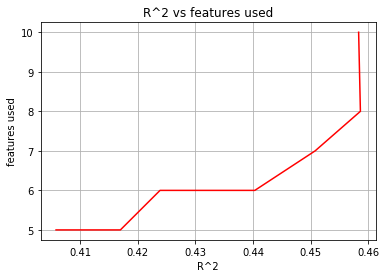

In [134]:
import matplotlib.pyplot as plt

X=np.ones(10)
Y=np.ones(10)

count=0;

for i in range (0,10):
    lasso=Lasso(alpha=i,max_iter=10000).fit(X_trn_scaled,y_train)
    X[count]=lasso.score(X_tst_scaled,y_test)
    Y[count]=np.sum(lasso.coef_!= 0) 
    count+=1;
    
plt.plot(X,Y,color="red", linewidth=1.5) 
plt.ylabel('features used') 
plt.xlabel('R^2')    

plt.title('R^2 vs features used')
plt.grid()


We are here handling on 10 features in this model.I will prefer the point(0.4599,8) to be considered as the most efficient.
Because this point is taking only 8 features out of 10 from train, also giving the highest value for the R square as a output.

In [137]:
from sklearn.model_selection import GridSearchCV

grid_search=GridSearchCV(Lasso(),param_grid={'alpha':[0,1,2,3,4,5,6,7,8]},cv=3).fit(X_trn_scaled, y_train).best_estimator_

lasso = Lasso(alpha = grid_search.alpha).fit(X_trn_scaled,y_train)

print("Alpha",grid_search.alpha)

print("R*2 for train = ",lasso.score(X_trn_scaled,y_train))

print("R*2 for test = ",lasso.score(X_tst_scaled,y_test))

print("number of features used = ",np.sum(lasso.coef_!= 0))


Alpha 1
R*2 for train =  0.5283207286166693
R*2 for test =  0.4586304186711237
number of features used =  8


C:\Users\saura\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\saura\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\saura\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310372.23465080454, tolerance: 142.22138363636364
  positive)
C:\Users\saura\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sau

Inductive Conformal Predictor.

In [138]:

X_trn_proper,X_calibration,y_trn_proper,y_calibration = train_test_split(X_train, y_train, test_size=99, random_state=1806)

scaler = StandardScaler().fit(X_trn_proper)

X_trn_proper_s = scaler.transform(X_trn_proper)

X_calibration_s = scaler.transform(X_calibration)

X_test_s = scaler.transform(X_test)

In [135]:
lasso = Lasso().fit(X_trn_proper_s,y_trn_proper)

Results:-
1)Training and Test R*2 values with default version diabetes dataset of Scikit-learn
  Train- 0.3752773016717367
  Test- 0.3129513083651597
  Number of features used-2
  
2)Training and Test R*2 values with original version diabetes dataset.
  Train- 0.5265840700907847
  Test- 0.45048329267014037
  Number of features used-10
  
3)Training and Test R*2 values with original version diabetes dataset after Scaling.
  Train- 0.5283207286166693
  Test-  0.4586304186711237
  Number of features used-8  
  
4)Training and Test R*2 values with best parameters chosen by cross-validation.
  Train- 0.5283207286166693
  Test-  0.4586304186711237
  Number of features used-8 
   
5)  

  
  